### Worksheet 5: Discover the Higgs Boson.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Meryem El baz

For this worksheet, we provide you with a (simplified) version of the simulated Higgs boson data challenge, run by Kaggle in 2014. The files are called "Higgs_features.csv" and "Higgs_labels.csv". The labels are 0 and 1, corresponding to "no Higgs signal", and "Higgs signal".

1\. Read the data into two numpy arrays, one for features and one for labels.

In [8]:
import numpy as np
x=np.genfromtxt('Higgs_features.txt', delimiter=",")
y=np.genfromtxt('Higgs_labels.txt', delimiter=",")
print(x)
print(y)

[[ 393.335   79.46   308.879 ...   -1.411   49.063   39.478]
 [  71.048   29.291   55.602 ...   -1.412   22.926    9.486]
 [ 141.45    87.017   72.091 ...    1.233   23.591   69.754]
 ...
 [  78.421   51.766   51.303 ...    1.108   26.775   30.509]
 [  90.507   70.86    75.535 ...   -1.41    45.511   27.279]
 [-999.      71.491   35.996 ...   -1.395   20.52    44.2  ]]
[0. 0. 0. ... 0. 0. 0.]


2\. How many instances and features are in this data set?

In [65]:
x.shape

(25000, 8)

3\. Plot the distribution of each feature for this data set in a histogram (like we did in on of the previous worksheets), in one plot. Add a legend (with labels "Feature 1", "Feature 2"...) and set the transparency of the histograms (property "alpha") to 0.5 for clarity. Hint: make sure you are plotting each column, not each row!

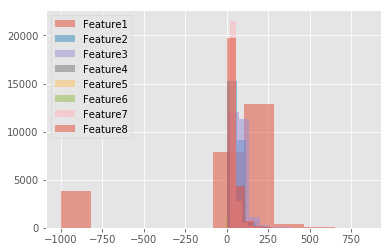

In [24]:
for i in range(x.shape[1]):
    plt.hist(x[:,i],alpha=0.5,histtype='stepfilled',label = 'Feature'+str(i+1));
plt.legend()

4\. Do you see anything unusual in the distribution of any of the features? What problem could this cause?

5\. How many positive (Higgs) events does your data set contain? Based on this, is the data set balanced or unbalanced?

In [31]:
np.sum(x > 0), np.sum(x < 0)

(182768, 17225)

6\. On the basis of your answer to 5, which evaluation metric (accuracy, precision, recall) would you like to pick for this data set?

7\. Use a decision tree classifier as your model, and do five fold cross validation on your data, <b> using the scoring parameter you chose above</b>. Report the mean and standard deviation of the scores obtained for the five folds.

Note: If you simply set the parameter "cv = 5" in the cross_val_score function, this will divide the data in five sets using the first 20%, second 20%... etc of your data, which is not great if your data are in a specific order. Make sure you use cv = StratifiedKFold(shuffle=True, n_splits=5).


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
model = DecisionTreeClassifier()
scores = cross_val_score(model, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='recall') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.64955752 0.64483776 0.62536873 0.63185841 0.65466352]
0.6412571874357875
0.010974751493599125


8\. We want to now take a look at the confusion matrix for your classifier. When doing cross validation, sklearn offers a function called cross_val_predict that allows you to save the vector with the predicted values when each object is part of the test set. (http://scikit-learn.org/stable/modules/cross_validation.html). The code for doing that follows; of course you will have to change the name of the model (algorithm) and of the arrays.

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(model, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5))
print(predicted)
print(metrics.confusion_matrix(y, predicted)) 

[0. 0. 1. ... 0. 0. 0.]
[[13435  3091]
 [ 3091  5383]]


9\. Given your confusion matrix, how many true positives / true negatives / false positives / false negatives are there? Do you have many more type I errors (false positives) than type II errors (false negatives)?

10\. Let's now switch to a SVC classifier. Leaving the parameters of the classifier at their default values, run a five-fold cross validation and report the scores just like you did above for the decision tree. (Note: SVMs are slow so this might take some time, a good 5 minutes on my laptop). Which algorithm performs better? 

In [3]:
from sklearn.svm import SVC
model = SVC()
scores = cross_val_score(model, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='recall') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

11\. Report the confusion matrix for the SVC algorithm. Do you notice a change in the distribution of the false positives and false negatives, with respect to the decision tree algorithm?

In [55]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
predicted2 = cross_val_predict(model, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [ ]:

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, predicted2)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix')

12\. We can now do the nested cross validation to optimize the parameters of the SVC. Because it would otherwise take a long time, we can select the first 10% of the data set (after shuffling the data set). We did something like this when we were doing learning curves in Worksheet 4 (questions 11 and 12). Select the first 10% of the data set, both for feature and labels.

In [9]:
number_samples = x.shape[0]
from sklearn.utils import shuffle
x, y = shuffle(x, y, random_state=10)
xlittle, ylittle = x[:int(number_samples*0.01),:], y[:int(number_samples*0.01)]

13\. Set up and run a nested cross validation with 5 outer folds and 3 inner folds. Your GridSearch CV will have the following parameters: 

parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}

You can use the last example ("putting them all together") from the SVMs and Hyperparameter fitting notebook, but remember to change the scoring parameter to match what you did above.

Note: this might take time! Set verbose = 2 in the GridSearchCV to follow the progress, and set njobs = 4 or more to speed up the process. If your machine can't handle it, you can reduce the size of the data set to 5% of the original. 

#### Report the scores and parameters values of the best model.

Note: some times that code has given me an issue of creating "Nan" in the ylittle_train arrays. If this happens, you can try substituting the lines

ylittle_train = ylittle[train_index]
ylittle_test = ylittle[test_index]
    
with 

ylittle_train = ylittle.iloc[train_index]
ylittle_test = ylittle.iloc[test_index]

(see https://stackoverflow.com/questions/39376967/nans-suddenly-appearing-for-sklearn-kfolds)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#Important! COMMENT

#Outer k-fold:
import time
outercv = StratifiedKFold(n_splits=5, shuffle=True) #creates 5 disjoint splits

innercv = StratifiedKFold(n_splits=4, shuffle=True) #creates 4 disjoint splits

i=0

winning_model_scores = []

for train_index, test_index in outercv.split(xlittle,ylittle): #This runs the outer cross validation
    
    i+=1
    
    print('Fold ' ,i, 'outer cross validation')
    
    Xlittle_train = xlittle[train_index] #"yellow" training set
    ylittle_train = ylittle[train_index]
    
    Xlittle_test = xlittle[test_index]
    ylittle_test = ylittle[test_index]
    
    #optimizing SVC: this replaces the inner loop!
    
    parameters = {'kernel':['rbf','linear'],'gamma':[0.01, 0.05, 0.1], 'C':[1,10,100],\
                  'class_weight':[{1:1},{1:3},{1:5}]}
    nmodels = np.product([len(el) for el in parameters.values()])
    start = time.time()
    model = GridSearchCV(SVC(), parameters, cv = innercv, scoring = 'recall', \
                     verbose = 2, n_jobs = 4)
    model.fit(Xlittle_train, ylittle_train)
    stop = time.time()
    print('Best params, best score:', "{:.4f}".format(model.best_score_), model.best_params_)
    print('Time per model (s):', "{:.4f}".format((stop-start)/float(nmodels*4)))

    #Compute test scores with optimal parameters on outer i-th test fold
    
    winner = model.best_estimator_
    
    winner.fit(Xlittle_train, ylittle_train)
    
    ypred = winner.predict(Xlittle_test)
    
    winning_model_scores.append(metrics.recall_score(ylittle_test,ypred)) #append this to the outer cv results
    
print('The average of the winning model scores (i.e. the generalization error) is', \
      np.mean(winning_model_scores), np.std(winning_model_scores) )


Fold  1 outer cross validation
Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 15.1min finished
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params, best score: 0.9860 {'C': 1, 'class_weight': {1: 5}, 'gamma': 0.01, 'kernel': 'linear'}
Time per model (s): 4.2135
Fold  2 outer cross validation
Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 183 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 17.3min finished
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params, best score: 0.9861 {'C': 1, 'class_weight': {1: 5}, 'gamma': 0.01, 'kernel': 'linear'}
Time per model (s): 4.8671
Fold  3 outer cross validation
Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 156 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 16.5min finished
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params, best score: 0.9575 {'C': 1, 'class_weight': {1: 5}, 'gamma': 0.01, 'kernel': 'linear'}
Time per model (s): 4.6078


15\. Now that you have optimized the parameters, you can run the 5 fold cross validation on the original data set, basically what you did in 10., but fixing the parameter values at the "optimal values" found above (i.e., choose the model that was most often selected as the winner model). What are the mean and standard deviation of the scores?

In [2]:
from sklearn.svm import SVC
?SVC

In [ ]:
from sklearn.svm import SVC
model = SVC(C= 1, class_weight= {1: 5}, gamma= 0.01, kernel= 'linear')
scores = cross_val_score(model, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='recall',n_jobs=6) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

16\. Based on what you found, would you recommend to use a Decision Tree Classifier or a Support Vector Classifier for this problem?

Extra Credit: The object GridSearchCV (probably called clf in your code) that you created in 13. has an attribute "grid\_scores\_" that allows you to visualize the scores for every combination of parameters (if you are using sklearn version 0.19 and above, the attribute is named cv\_results\_). Based on this, which parameter has the highest impact (induces the largest change) on the performance of the SVC? Do you think it might be worth optimizing it further?